In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv(r'C:\Users\user\Desktop\Grad\PY Modules\Loan.csv')

In [2]:
df["home_ownership"] = df["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"None":2,"ANY":1})
df["emp_length"] = df["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df["emp_length"] = df["emp_length"].replace('NaN', np.nan).fillna(0)
print("Current shape of dataset :",df.shape)

Current shape of dataset : (1551, 12)


In [3]:
data_with_loanstatus_sliced = df[(df['loan_status']=="Fully Paid") | (df['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})
Loan_target = Dataset_withBoolTarget.iloc [:, -1]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler ()
scaler.fit(df.drop('loan_status', axis =1))
scaled_features = scaler.transform(df.drop('loan_status', axis =1))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler ()
scaler.fit(df.drop('loan_status', axis =1))
scaled_features = scaler.transform(df.drop('loan_status', axis =1))

df_feat = pd.DataFrame(scaled_features, columns = df.columns [:-1])


In [6]:
x, y

(      funded_amnt  emp_length  home_ownership  annual_inc  last_pymnt_amnt  \
 0       -1.340482    1.097291        0.828332   -0.546132        -0.672667   
 1        1.069399    1.097291        0.828332   -0.323120        -0.556055   
 2        0.532601    1.097291        0.828332   -0.367722         1.604008   
 3        2.245786    1.097291        0.828332    0.680434        -0.570049   
 4       -0.563838   -0.756052        0.828332    0.556283         0.779223   
 ...           ...         ...             ...         ...              ...   
 1546    -1.066372   -1.550342        0.828332   -1.021593        -0.601938   
 1547    -1.094925   -0.491289       -0.605533   -0.323120        -0.464642   
 1548    -0.495311   -1.285579       -0.605533   -0.077807        -0.663780   
 1549     2.245786    1.097291        0.828332    0.212109         2.725781   
 1550     0.932344   -1.285579        0.828332   -0.824897        -0.619696   
 
       mort_acc  int_rate  mo_sin_old_rev_tl_op  a

In [7]:
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve 
from sklearn import linear_model

In [8]:
def plot_learning_curve (estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [9]:
x = df_feat
y = df["loan_status"]
title = "Learning Curves (Logistic Regression)"

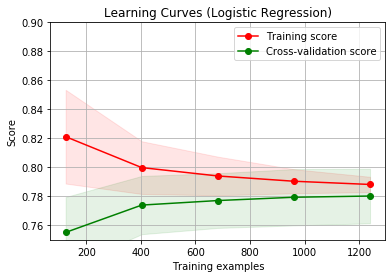

In [10]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, x, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rfPredict = rf.predict(x_test)
rfPredictProb = rf.predict_proba(x_test)[:,1] 
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)

0.8047210300429185


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
clf_knn = KNeighborsClassifier()
k_range = list(range(35, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 38}
---------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')


In [14]:
clf_knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn_final.fit(x_train,y_train)
knn_pred = clf_knn_final.predict(x_test)
knn_predictproba = clf_knn_final.predict_proba(x_test)[:,1]
KNN_Acc = accuracy_score(y_test,knn_pred)
print("KNN accuracy is ",KNN_Acc)

KNN accuracy is  0.7296137339055794
